In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,...,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,...,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,Given a list,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,250000.0,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Emacs;Helix,Emacs;Helix,MacOS;Other Linux-based,MacOS;Oth

In [35]:
df.shape

(596, 84)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           596 non-null    int64  
 1   Q120                                 596 non-null    object 
 2   MainBranch                           596 non-null    object 
 3   Age                                  596 non-null    object 
 4   Employment                           592 non-null    object 
 5   RemoteWork                           512 non-null    object 
 6   CodingActivities                     511 non-null    object 
 7   EdLevel                              593 non-null    object 
 8   LearnCode                            591 non-null    object 
 9   LearnCodeOnline                      462 non-null    object 
 10  LearnCodeCoursesCert                 231 non-null    object 
 11  YearsCode                       

In [38]:
df.tail()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,...,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
591,592,I agree,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Codecademy;Udemy;Pluralsight,22,17,"Developer, back-end",500 to 999 employees,I have little or no influence,NaN,Start a free trial;Ask developers I know/work ...,Portugal,EUR European Euro,100000.0,C#;HTML/CSS,C#;SQL,Cosmos DB;Microsoft SQL Server,Cosmos DB;Microsoft SQL Server,Microsoft Azure,Amazon Web Services (AWS);Microsoft Azure,Angular;ASP.NET;ASP.NET CORE;React,ASP.NET;ASP.NET CORE;React,.NET (5+) ;Flutter,.NET (5+),Docker;NuGet,NuGet,Visual Studio Code,Visual Studio Code,Windows,Windows,GitHub Discussions;Wikis,...,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely",NaN,Yes,Very favorable,Increase productivity;Greater efficiency;Speed...,Highly trust,Learning about a codebase;Project planning;Doc...,Writing code;Testing code;Collaborating with t...,NaN,Testing code,NaN,NaN,NaN,Writing code;Collaborating with teammates,Yes,Individual contributor,18.0,Strongly agree,Agree,Disagree,Agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Agree,1-2 times a week,3-5 times a week,Never,15-30 minutes a day,Less than 15 minutes a day,DevOps function;Microservices;Automated testin...,Healthcare,Appropriate in length,Easy,107090.0
592,593,I agree,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Hobby;Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Udemy,25,16,"Developer, full-stack",100 to 499 employees,I have little or no influence,NaN,Ask developers I know/work with;Visit develope...,"Venezuela, Bolivarian Republic of...",VES\tVenezuelan bolivar,54000.0,HTML/CSS;JavaScript;PHP;SQL,HTML/CSS;JavaScript;PHP;SQL,MariaDB;MySQL,MariaDB;MySQL,NaN,NaN,jQuery;WordPress,Gatsby;jQuery;Laravel;Next.js;Node.js;React;Wo...,NaN,NaN,Composer;Webpack,Composer;Webpack,Visual Studio Code,Visual Studio Code,Windows,Windows,Jira,...,A few times per week,Yes,A few times per week,"Yes, somewhat",NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,2032.0
593,594,I agree,"I am not primarily a developer, but I write co...",18-24 years old,"Student, full-time",NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Blogs with tips and tricks;Written-based Onlin...,Codecademy;Udemy;Pluralsight,4,NaN,NaN,NaN,NaN,Other,Visit devel

In [39]:
df.head(20)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,...,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,...,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,Given a list,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,250000.0,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Emacs;Helix,Emacs;Helix,MacOS;Other Linux-based,MacOS;Oth

In [40]:
pd.set_option('display.max_columns', 77)
pd.set_option('display.max_rows', 18)

In [41]:
df

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,...,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,...,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,Given a list,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,250000.0,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Emacs;Helix,Emacs;Helix,MacOS;Other Linux-based,MacOS;Oth

In [ ]:
schema_df = pd.read_csv('data/survey_results_schema.csv')
schema_df

In [30]:
df['RemoteWork'].value_counts()

RemoteWork
Hybrid (some remote, some in-person)    233
Remote                                  179
In-person                               100
Name: count, dtype: int64

In [42]:
df['Country'].value_counts()

Country
Germany                                                 84
United States of America                                57
India                                                   48
United Kingdom of Great Britain and Northern Ireland    30
Italy                                                   28
                                                        ..
Kosovo                                                   1
United Arab Emirates                                     1
Bahrain                                                  1
Philippines                                              1
Venezuela, Bolivarian Republic of...                     1
Name: count, Length: 73, dtype: int64

In [ ]:
youngest_senior_devs = df[df['DevType'].str.contains('Senior')].nsmallest(10, 'Age')
print(youngest_senior_devs)
#აქ ვითვლით ყველაზე ახალგაზრდა დეველოპერების რაოდენობას, რომლებსაც აქვთ senior-ის სტატუსი მოპოვებული

In [46]:
#ფილტრაცია პროგრამირების ენების მიხედვით
languages = ['Python', 'C', 'C++','JavaScript', 'Kotlin']
lan_filt = df['LanguageHaveWorkedWith'].isin(languages)
lan_filt

0      False
1      False
2      False
3      False
4      False
       ...  
591    False
592    False
593    False
594    False
595    False
Name: LanguageHaveWorkedWith, Length: 596, dtype: bool

In [47]:
df['Country'].value_counts()['Georgia']

2

In [48]:
country_grp = df.groupby(['Country']) 
country_grp

In [49]:
country_grp['CompTotal'].agg(['median', 'mean']).loc['Georgia']
#აქ ვითვლით ხელფასების მედიანას საქართველოში

median    50000.0
mean      50000.0
Name: Georgia, dtype: float64

In [53]:
df.head(500)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,...,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,...,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,Given a list,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,250000.0,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Emacs;Helix,Emacs;Helix,MacOS;Other Linux-based,MacOS;Oth

In [56]:
df['Age'] = df['Age'].str.extract('(\d+)').astype(float)
# აქ ასაკის სვეტი გადაგვყავს ინტში

# ვითვლით საშუალო ასაკს იმ ხალხის ვინც მუშაობს remote-ად
average_age_remote_workers = df[df['RemoteWork'] == 'Remote']['Age'].mean()
average_age_remote_workers

30.77094972067039

In [63]:
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Calculate statistics
min_salary = df['CompTotal'].min()
max_salary = df['CompTotal'].max()
average_salary = df['CompTotal'].mean()
median_salary = df['CompTotal'].median()

print("Minimum Salary:", min_salary)
print("Maximum Salary:", max_salary)
print("Average Salary:", average_salary)
print("Median Salary:", median_salary)

Minimum Salary: 0.0
Maximum Salary: 3600000000.0
Average Salary: 15346920.622699387
Median Salary: 90000.0


NameError: name 'emp_percentage' is not defined

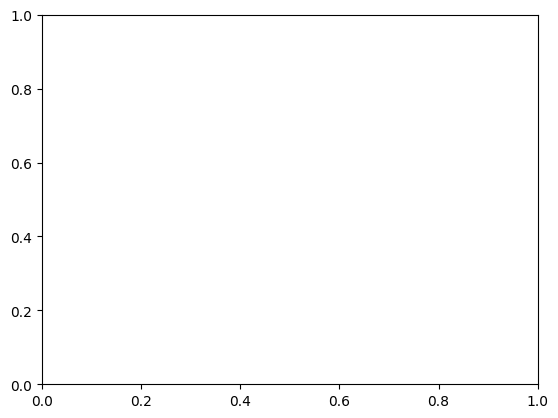

In [66]:
import matplotlib.pyplot as plt

# Define neon colors for the bars
neon_colors = ['#FF6B6B', '#75E1FF', '#FFD700', '#FF69B4', '#98FB98']


# Create the horizontal bar chart
fig, ax = plt.subplots()

# Plot the horizontal bars with neon colors
bars = emp_percentage.plot(kind='barh', color=neon_colors, ax=ax)

# Set labels and title
ax.set_xlabel('Percentage')
ax.set_ylabel('Employment Status')
ax.set_title('Employment Status Distribution (Percentage)')

# Add percentages on the bars
for i, v in enumerate(emp_percentage):
    ax.text(v + 1, i, f'{v:.2f}%', va='center', color='black', fontweight='bold')

# Invert the y-axis for a top-down view
ax.invert_yaxis()

# Customize grid lines
ax.xaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
ax.set_axisbelow(True)

# Customize the grid lines and ticks
ax.set_yticks(range(len(emp_percentage)))  # Corrected missing closing parenthesis
ax.set_yticklabels(emp_percentage.index)

# Set a limit on the x-axis for better readability
ax.set_xlim(0, max(emp_percentage) + 10)


# Adjust the figure size
fig.set_size_inches(7, 4)

# Show the chart
plt.show()

In [68]:
emp = df['Employment'].value_counts().nlargest(10)
emp

Employment
Employed, full-time                                                         375
Independent contractor, freelancer, or self-employed                         56
Student, full-time                                                           42
Employed, full-time;Independent contractor, freelancer, or self-employed     32
Not employed, but looking for work                                           15
Employed, part-time                                                          11
Student, full-time;Employed, part-time                                        6
Employed, full-time;Student, full-time                                        6
Employed, full-time;Student, part-time                                        5
Not employed, and not looking for work                                        5
Name: count, dtype: int64

<Axes: xlabel='Age'>

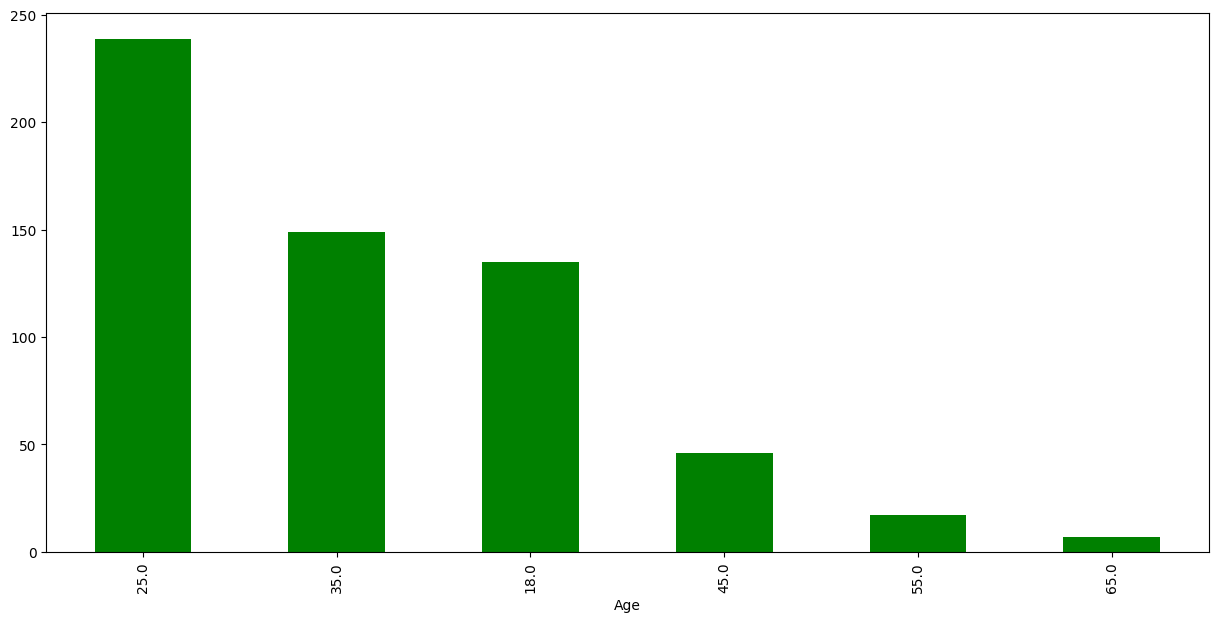

In [74]:
df['Age'].value_counts().plot(kind='bar', figsize=(15,7), color='green')

In [78]:
pybool = df['LanguageHaveWorkedWith'].str.contains('Python')
pybool.value_counts()
#მოცემული კოდი ითვლის თუ რამდენ ადამიანს უმუშავია ან არ უმუშავია Python დაპროგრამების ენაზე

LanguageHaveWorkedWith
False    318
True     270
Name: count, dtype: int64

In [80]:
most_wanted_language = df['LanguageWantToWorkWith'].value_counts().idxmax()
print("The most wanted programming language is:", most_wanted_language)
#აქ ვითვლით ყველაზე "სასურველ" პროგრამირების ენას, რომელთანაც გამოკითხული ადამიანები იმუშავებდნენ

The most wanted programming language is: Rust


In [83]:
languages = df['LanguageHaveWorkedWith'].str.split(';', expand=True)
languages.head

<bound method NDFrame.head of                           0                        1           2     3     4   \
0                        NaN                      NaN         NaN   NaN   NaN   
1                   HTML/CSS               JavaScript      Python  None  None   
2    Bash/Shell (all shells)                       Go        None  None  None   
3    Bash/Shell (all shells)                 HTML/CSS  JavaScript   PHP  Ruby   
4                   HTML/CSS               JavaScript  TypeScript  None  None   
..                       ...                      ...         ...   ...   ...   
591                       C#                 HTML/CSS        None  None  None   
592                 HTML/CSS               JavaScript         PHP   SQL  None   
593                 Assembly  Bash/Shell (all shells)           C    C#   C++   
594                   Python                        R        None  None  None   
595                   Elixir                   Erlang  JavaScript   PHP  None  

In [84]:
languages.stack().value_counts()
#ყველაზე ხშირად გამოყენებული პროგრამირების ენები

JavaScript    384
HTML/CSS      318
SQL           281
Python        270
TypeScript    239
             ... 
OCaml           2
GDScript        2
Crystal         2
Apex            2
Raku            1
Name: count, Length: 49, dtype: int64

<Axes: >

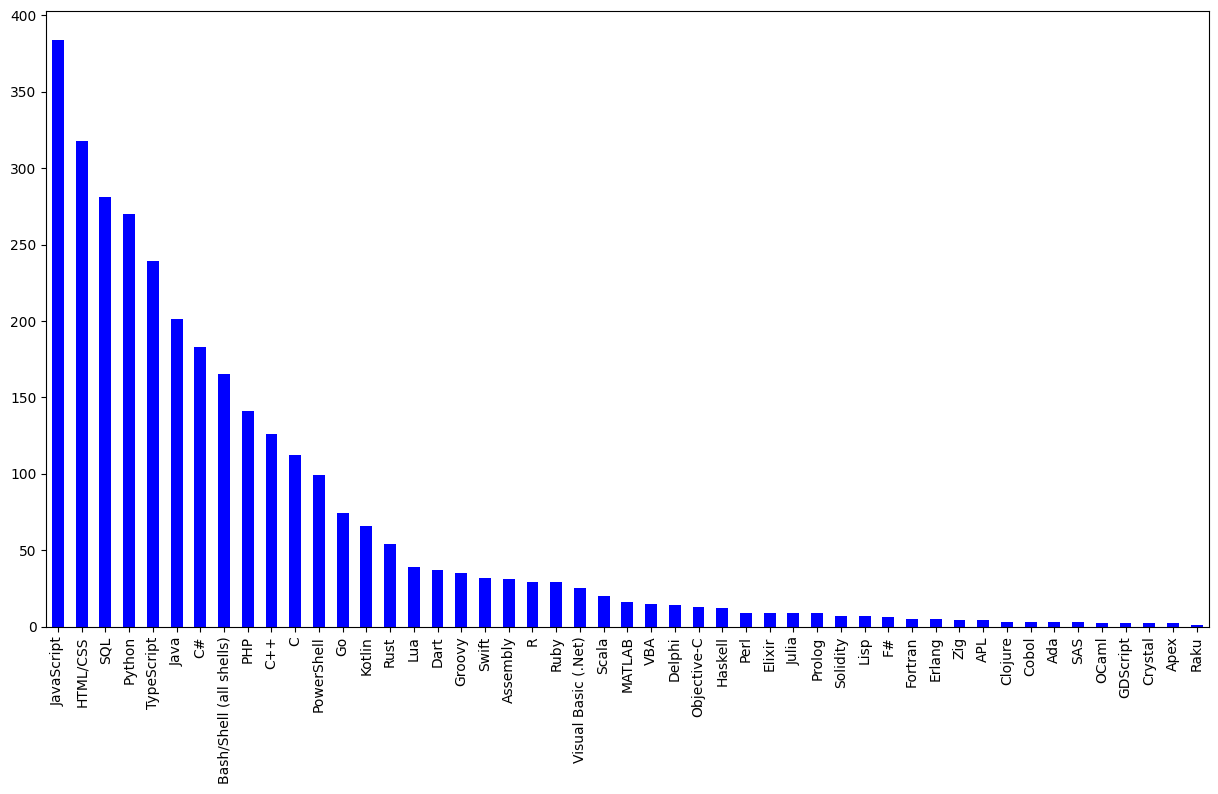

In [88]:
languages.stack().value_counts().plot(kind='bar', color='blue', figsize=(15,8))
#წინა დავალების ვიზუალურად წარმოდგენა

In [94]:
total = df.loc[lan_filt][['LanguageHaveWorkedWith', 'Country']].value_counts()
total.head(20)

LanguageHaveWorkedWith  Country    
C                       Pakistan       1
Python                  Brazil         1
                        Slovakia       1
                        Serbia         1
                        Netherlands    1
                                      ..
JavaScript              Switzerland    1
                        Germany        1
                        France         1
C++                     Poland         1
                        India          1
Name: count, Length: 20, dtype: int64

In [98]:
emp = df['Employment'].value_counts().nlargest(10)
emp

Employment
Employed, full-time                                                         375
Independent contractor, freelancer, or self-employed                         56
Student, full-time                                                           42
Employed, full-time;Independent contractor, freelancer, or self-employed     32
Not employed, but looking for work                                           15
Employed, part-time                                                          11
Student, full-time;Employed, part-time                                        6
Employed, full-time;Student, full-time                                        6
Employed, full-time;Student, part-time                                        5
Not employed, and not looking for work                                        5
Name: count, dtype: int64